# Fluent Python
https://github.com/fluentpython/example-code

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

def time_check(func):
    def decorated():
        import time
        start = time.time()
        func()
        print("---{}s seconds---".format(time.time()-start_time))
    return decorated

## CH3.Dictionaries and Sets

### Generic Mapping Types

dict 내장함수 \__builtins__.__dict__

해시테이블 엔진으로 되어 있음


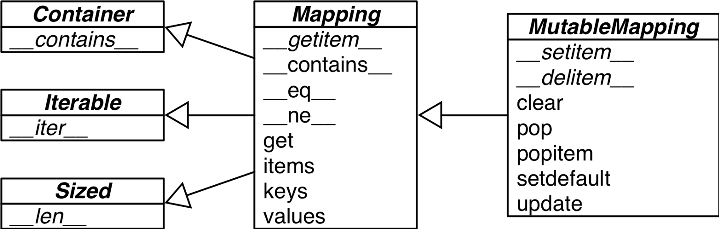

In [2]:
my_dict = {}
import collections
isinstance(my_dict, collections.abc.Mapping) 
# dict 는 mapping 클래스를 이용해 만들어진다

True

파이썬 용어 사전 : https://docs.python.org/3/glossary.html#term-hashable

Hashable : 수명 주기동안 결코 변하지 않는 해시값을 가지고 (__hash__() 메서드 필요) 다른객체와 비교할수 있으면(__eq__()) hashable 하다고함

The atomic immutable types ( str , bytes , numeric types) are all hashable

In [4]:
tl = (1, 2, [30, 40])
hash(tl)

TypeError: unhashable type: 'list'

In [5]:
tf = (1, 2, frozenset([30, 40]))
hash(tf)

985328935373711578

In [6]:
# To create dictionaly 
a = dict(one=1, two=2, three=3)
b = {'one': 1, 'two': 2, 'three': 3}
c = dict(zip(['one', 'two', 'three'], [1, 2, 3]))
d = dict([('two', 2), ('one', 1), ('three', 3)])
e = dict({'three': 3, 'one': 1, 'two': 2})
a == b == c == d == e

True

### dict Comprehensions

In [13]:
import random
country_code = {code: country for code, country in zip(range(10), random.sample(range(10,100), 10))}
country_code

{0: 98, 1: 93, 2: 70, 3: 10, 4: 94, 5: 68, 6: 73, 7: 85, 8: 42, 9: 84}

update() dict 는 덕타이핑의 대표적인 사례

덕 타이핑(duck typing)은 동적 타이핑의 한 종류로, 객체의 변수 및 메소드의 집합이 객체의 타입을 결정하는 것을 말함

In [20]:
dict1 = {'A': 1, 'B': 2, 'C': 3}
dict2 = {'C': 2, 'D': 4, 'E': 5}
dict2.update(dict1)
dict1
dict2

{'A': 1, 'B': 2, 'C': 3}

{'C': 3, 'D': 4, 'E': 5, 'A': 1, 'B': 2}

In [19]:
dict1 = {'A': 1, 'B': 2, 'C': 3}
dict2 = {'C': 2, 'D': 4, 'E': 5}
dict(dict2, **dict1)
dict1
dict2

{'C': 3, 'D': 4, 'E': 5, 'A': 1, 'B': 2}

{'A': 1, 'B': 2, 'C': 3}

{'C': 2, 'D': 4, 'E': 5}

In [22]:
# KeyError 피하기는 방법
dict1.get('Z', 0)

0

In [44]:
import sys
import re
WORD = """a 
Although Z
ambiguity Z 
be Beautiful Z
beats Beautiful
Beautiful
better Z Z
"""
WORD_RE = re.compile('\w+')
index = {}

dict.setdefault() 

In [43]:
for line_no, line in enumerate(WORD.splitlines(), 1):
    for match in WORD_RE.finditer(line):
        word = match.group()
        column_no = match.start()+1
        location = (line_no, column_no)
        index.setdefault(word, []).append(location)

# print in alphabetical order
for word in sorted(index, key=str.upper):
    print(word, index[word])

a [(1, 1)]
Although [(2, 1)]
ambiguity [(3, 1)]
be [(4, 1)]
beats [(5, 1)]
Beautiful [(4, 4), (5, 7), (6, 1)]
better [(7, 1)]
Z [(2, 10), (3, 11), (4, 14), (7, 8), (7, 10)]


```
index.setdefault(word, []).append(location)
```
는 아래와 같다
```
if key not in my_dict:
    my_dict[key] = []
my_dict[key].append(new_value)
```

### defaultdict: Another Take on Missing Keys

defaultdict 는 존재하지 않는 키에 대해서 기본값을 생성 default_factory

In [46]:
import collections

index = collections.defaultdict(list) # 기본값으로 list 를 가진 dict 생성
for line_no, line in enumerate(WORD.splitlines(), 1):
    for match in WORD_RE.finditer(line):
        word = match.group()
        column_no = match.start()+1
        location = (line_no, column_no)
        index[word].append(location)

# print in alphabetical order
for word in sorted(index, key=str.upper):
    print(word, index[word])

a [(1, 1)]
Although [(2, 1)]
ambiguity [(3, 1)]
be [(4, 1)]
beats [(5, 1)]
Beautiful [(4, 4), (5, 7), (6, 1)]
better [(7, 1)]
Z [(2, 10), (3, 11), (4, 14), (7, 8), (7, 10)]


### The \__missing__ Method

dict.\__getitem__() 내장 메서드가 \__missing__() 메서드를 지원 

key 값이 없는 경우 \__missing__() 호출한다. 

### Variations of dict

- collections.OrderedDict : 삽입한 순서 유지
- collections.ChainMap : 매핑들의 목록을 담고 있고 한꺼번에 모두 검색 가능
- collections.Counter : 모든 키에 정수형 카운터를 갖고 있는 매핑 
- collections.UserDict : 표준 dict 처럼 작동하는 매핑을 파이썬으로 구현한 클래스 

### Subclassing UserDict

`UserDict` subclasses `MutableMapping`, the remaining methods that make StrKeyDict a full-fledged mapping are inherited from `UserDict` , `MutableMapping` , or `Mapping`

In [47]:
import collections
class StrKeyDict(collections.UserDict):
    def __missing__(self, key):
        # 형태를 검사해주지 않으면 무한히 돌 수 있다. 
        if isinstance(key, str):
            raise KeyError(key) 
        return self[str(key)]
    def __contains__(self, key):
        return str(key) in self.data
    def __setitem__(self, key, item):
        self.data[str(key)] = item

In [50]:
d = StrKeyDict([('2', 'two'), ('4', 'four')])
d

{'2': 'two', '4': 'four'}

In [57]:
d[1] = "one"
d.get(3, 'N/A')
3 in d

'N/A'

False

In [58]:
d[3]

KeyError: '3'

### Immutable Mappings

the types module provides a wrapper class called MappingProxy Type 

원래 매핑의 동적인 뷰를 제공하지만 읽기 전용 mappingproxy 객체를 반환해서 직접 변경 할 수 없다.

In [59]:
from types import MappingProxyType
d = {1: 'A'}
d_proxy = MappingProxyType(d)
d_proxy

mappingproxy({1: 'A'})

In [60]:
d_proxy[2] = 'X'

TypeError: 'mappingproxy' object does not support item assignment

In [62]:
d[2] = 'B' # 동적인 d_proxy 는 d 에 대한 변경은 반영한다. 
d_proxy[2]

'B'

### Set Theory

set([1,2,3]) 생성자를 사용하면 
생성자를 가져오기위해 집합명을 검색하고, 리스트 생성하고 리스트를 생성자에 전달함으로

{1,2,3} 사용하는 것이 더 빠름

dis 를 이용해서 두개의 연산에 대한 바이트코드 확인


In [63]:
from dis import dis 
dis('{1}')

  1           0 LOAD_CONST               0 (1)
              2 BUILD_SET                1
              4 RETURN_VALUE


In [64]:
dis('set([1])')

  1           0 LOAD_NAME                0 (set)
              2 LOAD_CONST               0 (1)
              4 BUILD_LIST               1
              6 CALL_FUNCTION            1
              8 RETURN_VALUE


### Hash Tables in Dictionaries

- sparse arry : 중간에 빈 항목을 가진 배열
- bucket : 해시 테이블 안에 있는 항목 

dict 해시 테이블에는 각 항목별로 버킷이 있고, 버킷에는 키에 대한 참조와 항목의 값에 대한 참조가 들어감. 버킷의 1/3 비워두고 많아지면 복사해서 공간을 확보. hash() 해시값을 계산해서 테이블에 넣음. 


The hash() built-in function works directly with built-in types and falls back to calling
\__hash__ for user-defined types.

\__eq__() a == b 가 참이면 hash(a) == hash(b) 참

`is` checks that 2 arguments refer to the same object, `==` checks that 2 arguments have the same value.

dict 속도를 위해 공간을 포기함, 들어가는 순서에 따라 hash 키가 충돌할경우 키순서는 달라질수 잇음.